In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataframe = pd.read_csv("/content/drive/MyDrive/diabetes.csv")

#Understanding the data - Predictive Analysis in diabetes



In [ ]:
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataframe.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
dataframe.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
dataframe.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Il est en effet déconcertant d'observer des cas où certains indicateurs physiologiques tels que la pression artérielle (PA) et l'insuline sont enregistrés à zéro dans un ensemble de données, en particulier dans le contexte du diagnostic du diabète. Bien qu'il soit plausible de rencontrer des valeurs nulles occasionnelles dues à des erreurs de saisie ou à des informations manquantes, cela soulève des questions quant à la validité et à la fiabilité des données.

Dans le cas où la pression artérielle est enregistrée comme nulle et que le résultat du diabète est également nul, cela peut suggérer que ces entrées pourraient être erronées ou incomplètes. Il est très improbable qu'une personne ait une pression artérielle nulle et qu'elle ne soit pas diabétique, car la pression artérielle est un paramètre physiologique fondamental indépendant du statut diabétique. Cette divergence souligne l'importance de l'assurance qualité des données et de l'examen approfondi des valeurs aberrantes et des incohérences lors du prétraitement des données.

En fait, de telles divergences soulignent la nécessité de procédures diligentes de nettoyage et de validation des données. Ces anomalies mettent en évidence des problèmes potentiels d'intégrité des données qui doivent être résolus pour garantir la fiabilité et la validité de l'ensemble des données. Dans la pratique, le traitement de ces anomalies peut impliquer l'imputation des valeurs manquantes sur la base de mesures statistiques ou de la connaissance du domaine ou, dans les cas extrêmes, la suppression ou le signalement des entrées erronées afin d'éviter qu'elles n'influencent l'analyse et les résultats du modèle.

Traduit avec DeepL.com (version gratuite)

#Exploratory Data Analysis: Feature Selection and Data Imputation



Feature selection involves identifying and selecting the most informative variables from the dataset, ensuring that only relevant features are included in the predictive model.

Data imputation addresses missing or invalid values in the dataset, ensuring that the data is complete and suitable for analysis and modeling.

###Data Size
To determine the size of the dataset.

This code snippet provides the dimensions of the dataset, indicating the number of rows (records) and columns (features).

####**Target Column and Correlation Coefficient**
To identify the target column for classification and explore the correlation between features.

The 'Outcome' column represents the target variable (0 for non-diabetic, 1 for diabetic). This is a binary classification task. The correlation coefficient matrix is computed to understand the relationships between different features.

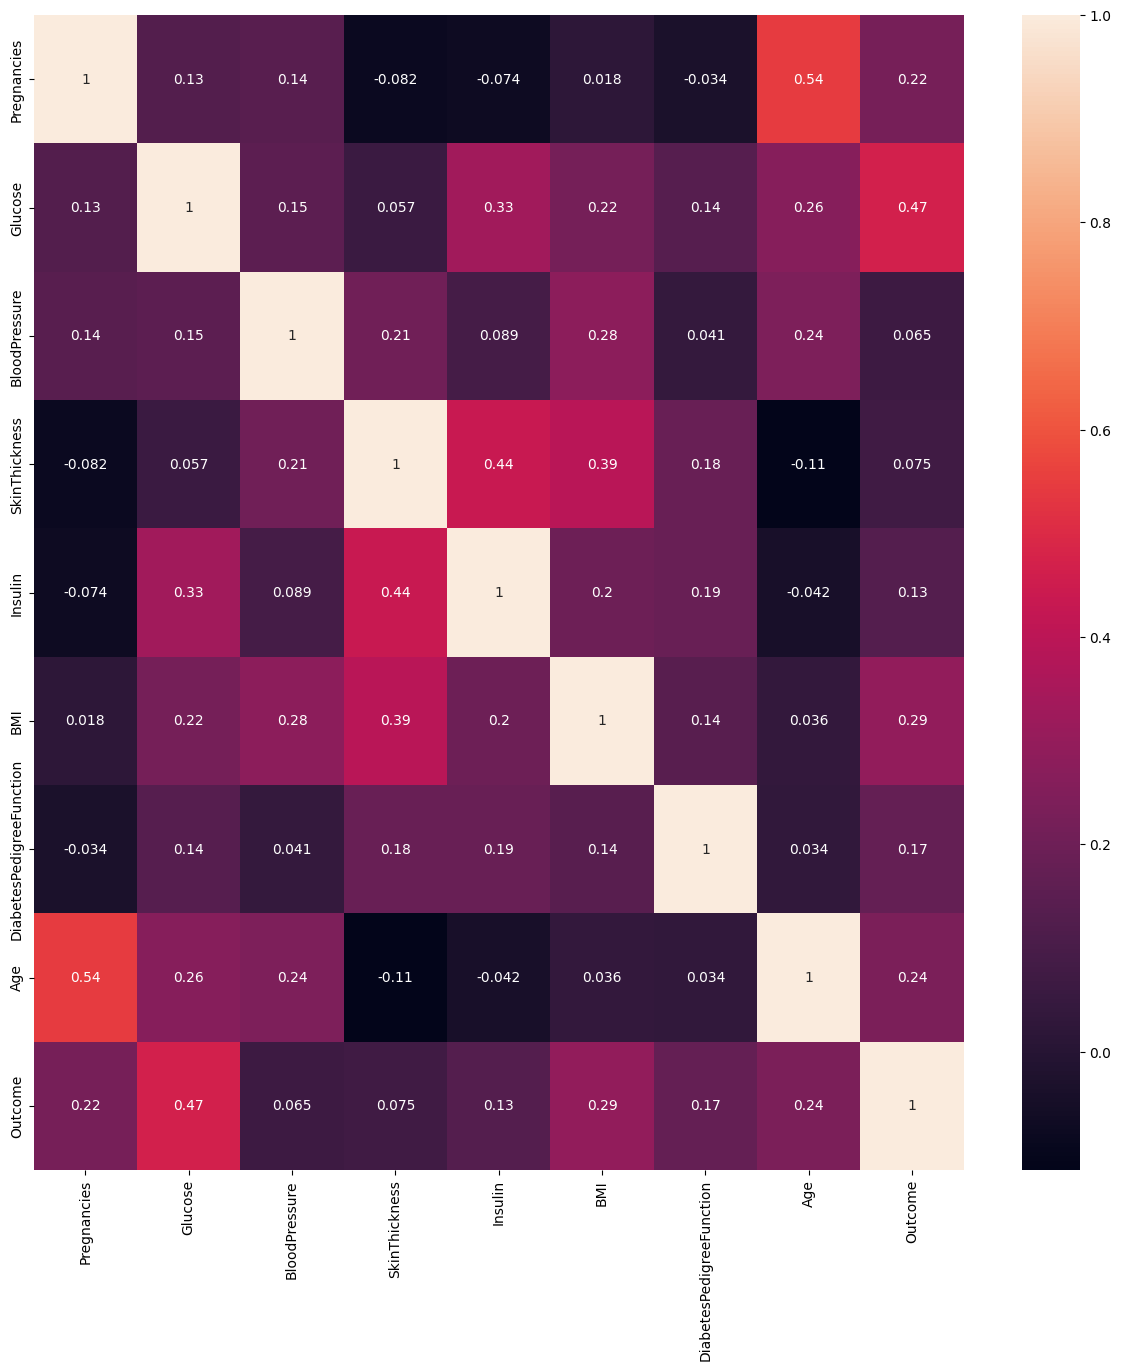

In [ ]:
dataframe.corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(dataframe.corr(), annot=True)
plt.savefig('correlation-coefficient.jpg')
plt.show()

####**Descriptive Statistics**
To compute descriptive statistics for numerical features in the dataset.

Descriptive statistics such as mean, standard deviation, minimum, maximum, etc., are calculated for numerical features to understand their distribution and variability.

In [ ]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


###**Data Imputation**
To handle missing or zero values in specific features through data imputation. This step visualizes the distribution of certain features using histograms and replaces zero values with appropriate statistics (median or mean) to address data gaps.

<ipython-input-11-a7eb563b2e94>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.Pregnancies)


<Axes: xlabel='Pregnancies', ylabel='Density'>

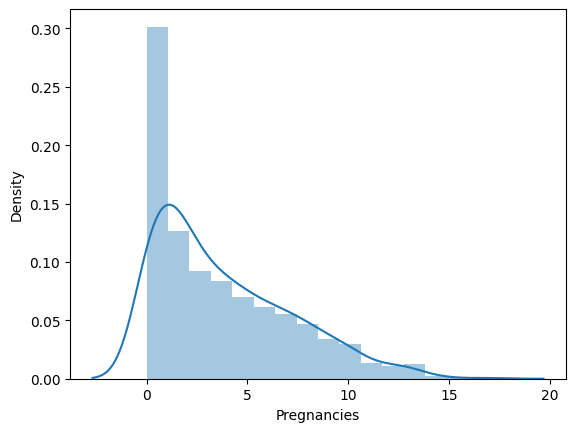

In [ ]:
sns.distplot(dataframe.Pregnancies)

<ipython-input-12-3011ea42bdb1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.BloodPressure)


<Axes: xlabel='BloodPressure', ylabel='Density'>

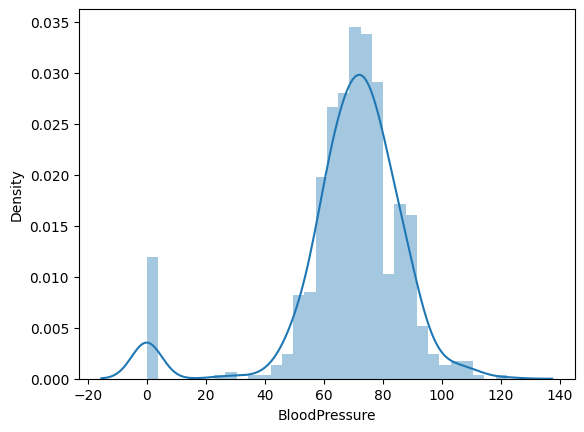

In [ ]:
sns.distplot(dataframe.BloodPressure)

<ipython-input-13-45eb6e49cb28>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.Insulin)


<Axes: xlabel='Insulin', ylabel='Density'>

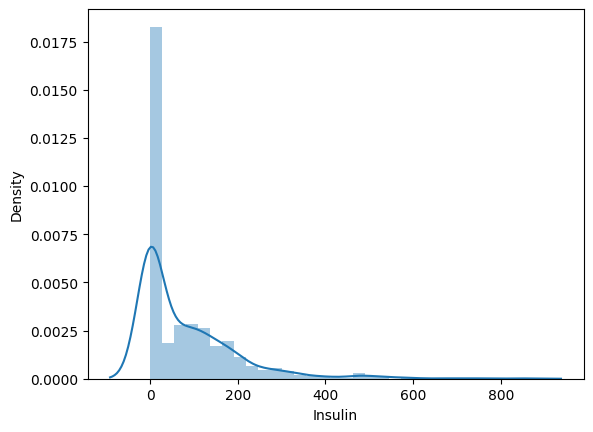

In [ ]:
sns.distplot(dataframe.Insulin)

In [ ]:
dataframe['Insulin'] = dataframe['Insulin'].replace(0, dataframe['Insulin'].median())
dataframe['Pregnancies'] = dataframe['Pregnancies'].replace(0, dataframe['Pregnancies'].median())
dataframe['Glucose'] = dataframe['Glucose'].replace(0, dataframe['Glucose'].mean())
dataframe['BloodPressure'] = dataframe['BloodPressure'].replace(0, dataframe['BloodPressure'].mean())
dataframe['SkinThickness'] = dataframe['SkinThickness'].replace(0, dataframe['SkinThickness'].median())
dataframe['BMI'] = dataframe['BMI'].replace(0, dataframe['BMI'].mean())
dataframe['DiabetesPedigreeFunction'] = dataframe['DiabetesPedigreeFunction'].replace(0, dataframe['DiabetesPedigreeFunction'].median())
dataframe['Age'] = dataframe['Age'].replace(0, dataframe['Age'].median())

##**Data Imputation Strategies**
###**Mean Imputation:**
The mean is a measure of central tendency that represents the average value of a dataset.
Mean imputation involves replacing missing or invalid values with the mean of the available data.
It is suitable for symmetrically distributed data without significant outliers.
Mean imputation assumes that the missing values are randomly distributed across the dataset and that the mean accurately represents the central tendency of the data.
###**Median Imputation:**
The median is another measure of central tendency that represents the middle value of a dataset when arranged in ascending order.
Median imputation involves replacing missing or invalid values with the median of the available data.
It is more robust to outliers and skewed distributions compared to the mean.
Median imputation is preferred when the data distribution is non-symmetric or when outliers are present.
Since the median is less influenced by extreme values, it provides a more representative estimate of the central tendency in such cases.
###**Mode Imputation for Categorical Data:**
Mode: The mode is a measure of central tendency that represents the most frequently occurring value in a dataset.
Mode Imputation: Mode imputation involves replacing missing values in categorical data with the mode of the respective column. This means filling in missing values with the value that appears most frequently in the dataset for that particular categorical variable.
Applicability: Mode imputation is suitable for categorical data where the missing values are assumed to be more likely to take on the most common category or class.
In summary, when imputing missing or invalid values in numeric data:

If the data distribution is **symmetric** and there are no significant outliers, mean imputation can be used.
If the data distribution is **non-symmetric** or contains **outliers**, median imputation is preferred as it provides a more robust estimate of central tendency.


##Exploratory Data Analysis: Outlier Detection and Normalization

Outliers and data normalization are crucial aspects of exploratory data analysis (EDA) that ensure the reliability and integrity of the dataset for subsequent analysis and modeling. In the context of the predictive analysis of diabetes, outlier detection helps identify unusual data points that may skew results, while normalization ensures that data is scaled uniformly, facilitating fair comparisons between features.

####**Outlier Detection**
Splitting the data into input features (X) and target value (y) is a necessary step before performing outlier detection. This separation allows us to focus solely on the input features when identifying outliers, as outliers in the target variable may not necessarily be indicative of anomalies in the input data. Here's how we can split the data and proceed with outlier detection:





In [ ]:
## Splitting the data into input features (X) and target value (y)
X = dataframe.drop(columns='Outcome', axis=1)
y = dataframe['Outcome']

Now, we proceed with outlier detection using box plots and the Interquartile Range (IQR) method, applied individually to each feature in the input data (X).

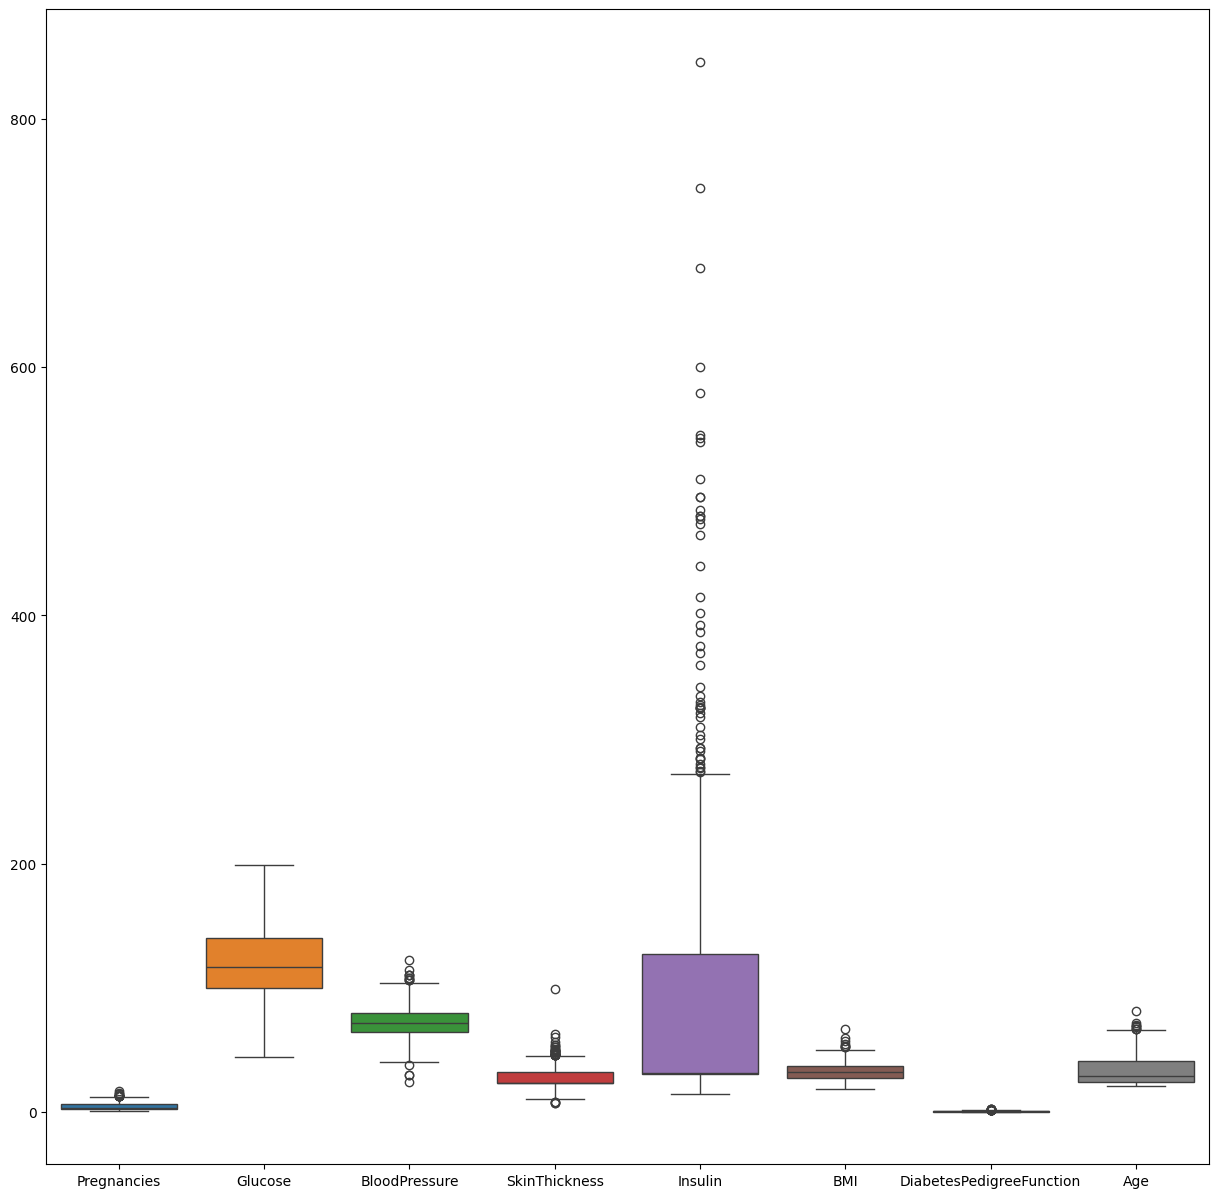

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(data = X, ax=ax)
plt.savefig('boxPlot.jpg')

###**What is box Plot?**
Box plot is a graphical representation of the distribution of a dataset. It displays key summary statistics such as the median, quartiles, and potential outliers in a concise and visual manner.

A box plot gives a five-number summary of a set of data which is-

Minimum – It is the minimum value in the dataset excluding the outliers.
First Quartile (Q1) – 25% of the data lies below the First (lower) Quartile.
Median (Q2) – It is the mid-point of the dataset. Half of the values lie below it and half above.
Third Quartile (Q3) – 75% of the data lies below the Third (Upper) Quartile.
Maximum – It is the maximum value in the dataset excluding the outliers.
Outliers - Data points lying outside the whiskers are identified as potential outliers. These are points that significantly deviate from the typical distribution of the data and may represent unusual observations, measurement errors, or rare events.
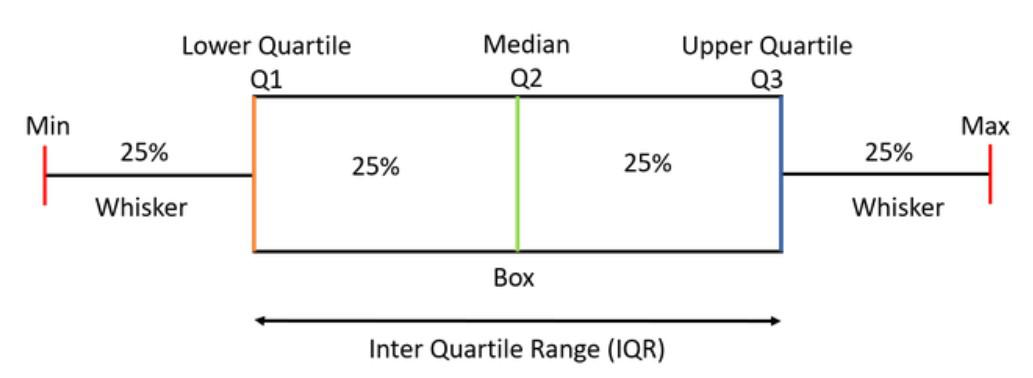


**Define outlier boundaries using IQR method for each feature**

The outliers are filtered out based on the boundaries defined by the IQR method for each feature.

In [ ]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (X[col] >= lower_bound) & (X[col] <= upper_bound)


###**Filter dataset to remove outliers**
Finally, the dataset is filtered to remove outliers, resulting in the outlier-detected input features (X_outlier_detection) and corresponding target values (y_outlier_detection), using following code:

In [ ]:
# Filter dataset to remove outliers
X_outlier_detection = X[mask]
y_outlier_detection = y[mask]

In [ ]:
X_outlier_detection.shape, y_outlier_detection.shape

((759, 8), (759,))

###**Shape comparison before and after outlier_detection**
The shapes of X and X_outlier_detection as well as y and y_outlier_detection indicate the number of samples (rows) and features (columns) in each dataset after outlier detection:

X: The original dataset of input features (X) has a shape of (768, 8), indicating that it contains 768 samples and 8 features.
X_outlier_detection: After outlier detection and filtering, the dataset of input features (X_outlier_detection) has a shape of (759, 8), indicating that it contains 759 samples and 8 features. This means that some samples were identified as outliers and removed from the original dataset during the outlier detection process.
y: The original dataset of target values (y) has a shape of (768,), indicating that it contains 768 samples.
y_outlier_detection: After outlier detection and filtering, the dataset of target values (y_outlier_detection) has a shape of (759,), indicating that it contains 759 samples. Since the outlier detection process is performed solely on the input features (X), the corresponding target values (y) are not affected, and the number of samples remains the same as in the original dataset.

###**Standardization**
Standardization transforms numerical features to a standard normal distribution, facilitating comparisons between features. It preserves the relative relationships between data points while removing differences in scale. Standardization is essential for algorithms sensitive to feature scales, such as gradient descent-based optimization algorithms.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_outlier_detection)

In the provided code snippet, the StandardScaler from Scikit-learn is utilized to standardize the numerical features in the dataset X_outlier_detection. Standardization involves transforming the features to have a mean of 0 and a standard deviation of 1, ensuring uniform scaling across all features. By standardizing the features, we facilitate fair comparisons between variables and improve the convergence of algorithms, ultimately contributing to more accurate predictive models in the context of diabetes analysis.

After standardization, the box plot may exhibit changes in the positioning of the median, the length of the box, and the placement of outliers. These changes reflect the transformation of the data distribution achieved through standardization, providing insights into the standardized distribution of the numerical features in the dataset.

###Exploratory Data Analysis: Outlier Handling Techniques

Outliers, or data points that significantly deviate from the rest of the dataset, can have a substantial impact on statistical analysis and machine learning models. Exploratory Data Analysis (EDA) involves various techniques for identifying and handling outliers to ensure the robustness and reliability of the analysis.

####**Outlier Detection**
Outlier detection plays a crucial role in ensuring the quality and accuracy of machine learning models. By identifying and removing or handling outliers effectively, we can prevent them from biasing the model, reducing its performance, and hindering its interpretability. Here’s an overview of various outlier detection methods:

Handling outliers in a dataset that follows a normal distribution involves understanding how outliers affect the properties of the distribution and devising appropriate strategies to deal with them:

**Identifying Outliers:** In a normal distribution, outliers are data points that lie far away from the mean, typically beyond a certain number of standard deviations. They may occur due to measurement errors, rare events, or genuine anomalies in the data.

**Z-Score Approach:** One common method for identifying outliers in a normal distribution is using the z-score. The z-score measures how many standard deviations a data point is away from the mean. Data points with z-scores beyond a certain threshold (e.g., ±3) are considered outliers.

**Handling Outliers**: Once outliers are identified, there are several strategies for handling them:

**Removal:** Outliers can be removed from the dataset if they are deemed to be the result of errors or do not represent genuine data patterns. However, caution should be exercised to ensure that important information is not lost.

**Winsorization:** Winsorization replaces extreme values with less extreme values within a specified range. This approach reduces the influence of outliers while preserving the overall distribution of the data.

**Transformation:** Transforming the data, such as taking the logarithm or square root of the values, can sometimes mitigate the effects of outliers by compressing their influence on the distribution.

**Robust Methods:** Robust statistical methods, such as robust regression or trimmed means, are less affected by outliers compared to traditional methods. These techniques downweight the influence of outliers and provide more reliable estimates.
#####**Statistical Methods:**
**Z-Score:** This method calculates the standard deviation of the data points and identifies outliers as those with Z-scores exceeding a certain threshold (typically 3 or -3).

**Interquartile Range (IQR):** IQR identifies outliers as data points falling outside the range defined by Q1-k*(Q3-Q1) and Q3+k*(Q3-Q1), where Q1 and Q3 are the first and third quartiles, and k is a factor (typically 1.5).

**Normal or Gaussian distribution:** It is often referred to simply as the bell curve due to its characteristic shape, is a probability distribution that is symmetric and unimodal. It is defined by two parameters: the mean (μ) and the standard deviation (σ). In a normal distribution:

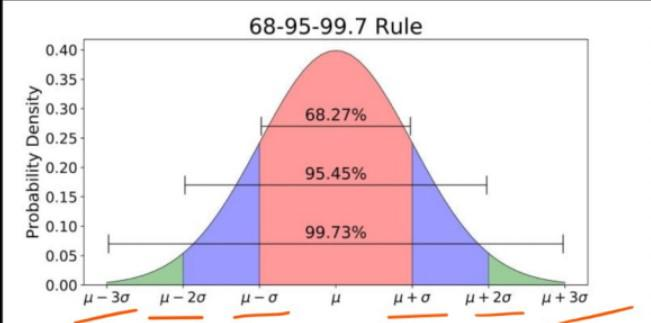

Normal distribution


**Symmetry**: The distribution is symmetric around the mean, with the mean, median, and mode being equal and located at the center of the distribution.

**Unimodality**: The distribution has a single peak, meaning that most data points cluster around the mean, with fewer points as you move away from the mean in either direction.
Step by step Guide for Quantile Approach:
1. Resetting Indexes:
Purpose: Resetting the indexes ensures that both X_scaled and y_outlier_detection have continuous and consistent index values, starting from 0.





In [ ]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
X_scaled = pd.DataFrame(X_scaled,columns=cols)
X_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02
mean,1.029772e-16,-3.978665e-17,-3.042508e-17,-1.509552e-16,-4.329724e-17,5.546727e-16,4.914821e-17,1.591466e-16
std,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00
min,-1.079800e+00,-2.558042e+00,-3.968588e+00,-2.200901e+00,-7.684941e-01,-2.081038e+00,-1.183313e+00,-1.062953e+00
25%,-7.491956e-01,-7.286101e-01,-6.755847e-01,-4.729631e-01,-6.126688e-01,-7.125819e-01,-6.852739e-01,-7.928253e-01
50%,-4.185912e-01,-1.517621e-01,-1.698412e-02,-4.729631e-01,-5.607270e-01,-7.202795e-02,-3.045975e-01,-3.426125e-01
75%,5.732217e-01,6.063810e-01,6.416165e-01,4.990017e-01,3.222827e-01,5.976421e-01,4.627740e-01,6.478556e-01
max,4.209869e+00,2.551183e+00,4.099270e+00,7.734740e+00,7.088876e+00,5.037846e+00,5.864467e+00,2.988962e+00


In [ ]:
X_scaled.reset_index(drop=True, inplace=True)
y_outlier_detection.reset_index(drop=True, inplace=True)

Explanation: The reset_index() method with drop=True parameter removes the existing index and replaces it with a new one starting from 0. The inplace=True parameter modifies the DataFrame in place, without creating a new object.

Output: After resetting the indexes, both X_scaled and y_outlier_detection now have continuous index values, facilitating further analysis and visualization.

2. Quantile-based Filtering:
Purpose: Filtering the data based on a high quantile threshold (95th percentile) for the 'Insulin' feature aims to remove extreme values or potential outliers.

In [ ]:
q = X_scaled['Insulin'].quantile(.95)
mask = X_scaled['Insulin'] < q
dataNew = X_scaled[mask]
y_outlier_detection = y_outlier_detection[mask]

Explanation: A threshold quantile (q) of 0.95 is computed for the 'Insulin' feature in the standardized dataset (X_scaled). Data points with 'Insulin' values below this threshold are retained (mask = X_scaled['Insulin'] < q), while those exceeding the threshold are filtered out.

3. Visualization with Box Plot:
Purpose: Visualizing the distribution of the filtered data using a box plot helps assess the impact of outlier removal and observe the updated distribution of the 'Insulin' feature.

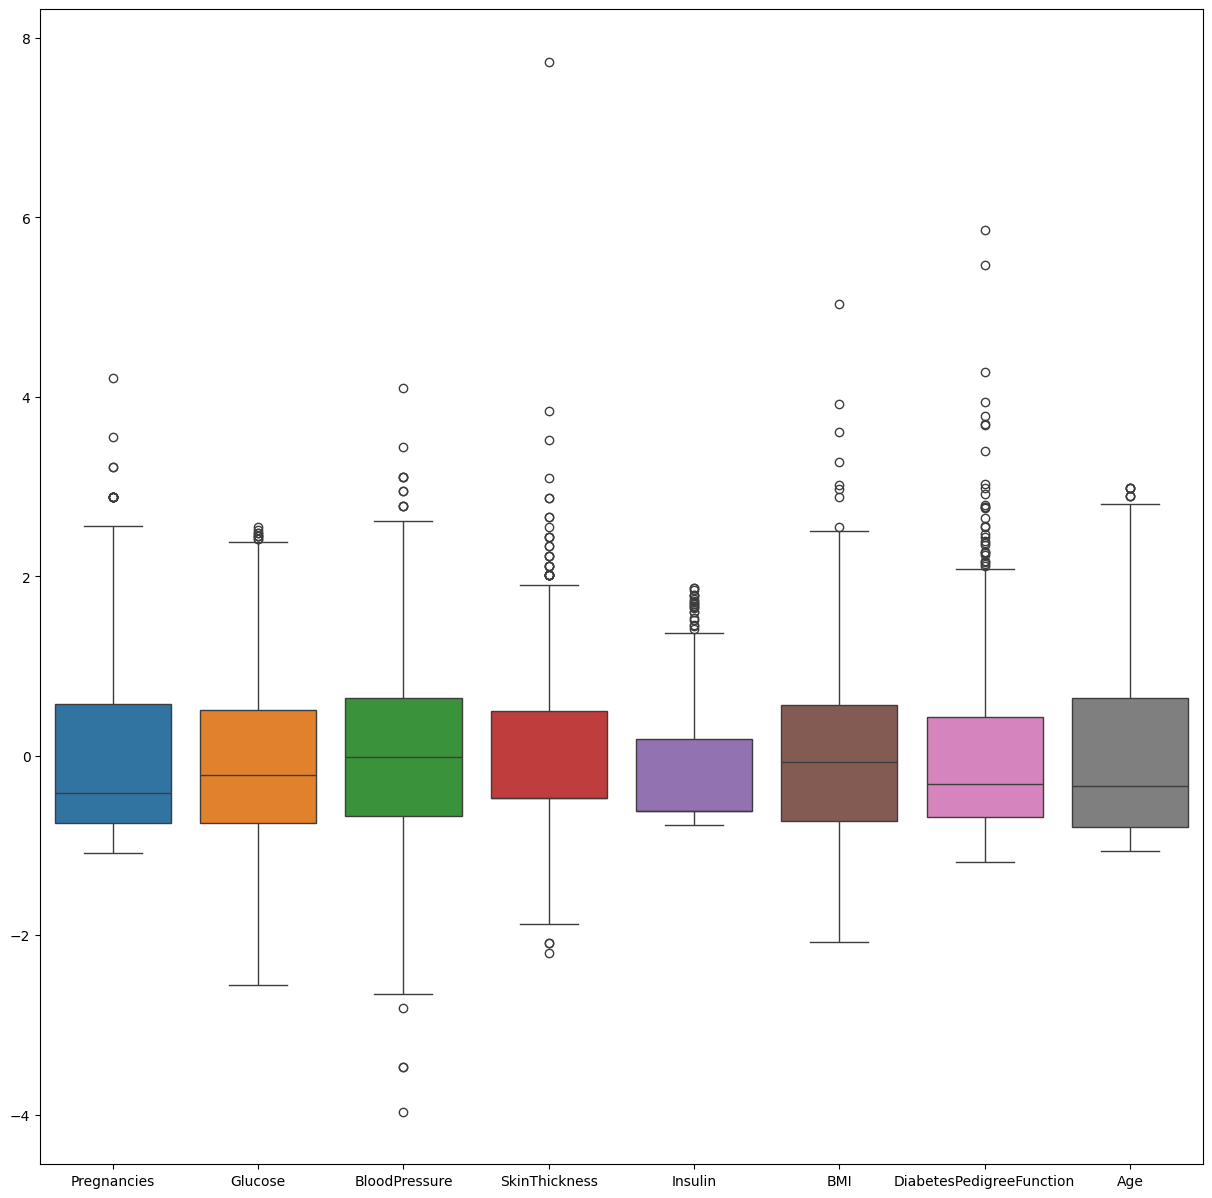

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(data = dataNew, ax=ax)
plt.savefig('boxPlot.jpg')

**Explanation:** A box plot is created for the filtered dataset (dataNew) to visualize the central tendency, spread, and potential outliers of the 'Insulin' feature after filtering.

**Output:** The box plot provides insights into the distribution of 'Insulin' values in the filtered dataset, highlighting any changes in the presence of outliers compared to the original distribution.

###Model Training Splitting of data and Handling Of Imbalanced Data

**Explanation:** We'll use the train_test_split function from Scikit-learn to randomly split the dataset into training and testing sets, typically with a ratio such as 80% for training and 20% for testing. 'test_size' parameter specifies the proportion of the dataset that should be allocated to the testing set. 'random_state' parameter is used to control the randomness of the data splitting process. It ensures that the data is split in the same way each time the code is run, which is important for reproducibility. Setting random_state to a fixed value (e.g., random_state=42) ensures that the data splitting process is deterministic and produces consistent results across different runs of the code. However, if random_state is not specified, the data splitting will be random, and the results may vary each time the code is executed.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataNew, y_outlier_detection, test_size=0.33, random_state=42)
X_train.shape, X_test.shape

((483, 8), (238, 8))

Handling Imbalanced Data:
Oversampling : Minority Class and increase that number to the majority class
Undersampling : Majority class and decrease that number to the minority class
SMOTE : Synthetic data and increase the number of samples to the majority class
Purpose: Imbalanced datasets occur when one class (e.g., positive cases of diabetes) is significantly underrepresented compared to another class (e.g., negative cases of diabetes). Handling imbalanced data is crucial to prevent the model from being biased towards the majority class.

Explanation: We can address class imbalance using techniques such as resampling (oversampling minority class or undersampling majority class), using appropriate evaluation metrics, or using algorithms specifically designed to handle imbalanced data (e.g., ensemble methods like Random Forest or boosting algorithms).

Before applying any resampling techniques, it's essential to understand the class distribution in our training data. For instance, in our dataset, there are 318 instances of the negative class (no diabetes) and 165 instances of the positive class (diabetes). This imbalance needs to be addressed to ensure that the model does not disproportionately favor the majority class.

In [ ]:
print(y_train.value_counts())

Outcome
0    318
1    165
Name: count, dtype: int64


Code (Example of Oversampling with SMOTE):

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check resampled class distribution
print("\nResampled class distribution:")
print(pd.Series(y_train_resampled).value_counts())


Resampled class distribution:
Outcome
0    318
1    318
Name: count, dtype: int64


In this example, we use SMOTE (Synthetic Minority Over-sampling Technique) to oversample the minority class (positive cases of diabetes) in the training set. The fit_resample method applies the SMOTE algorithm to generate synthetic samples for the minority class, balancing the class distribution. This ensures that our model is trained on a balanced dataset, reducing the risk of bias towards the majority class.

####**Model Training:**
**Purpose:** Model training involves fitting a logistic regression model to the training data to learn the relationship between the input features and the target variable.

In [ ]:
from sklearn.linear_model import LogisticRegression
# Initialize Logistic Regression classifier
logistic_regression_model = LogisticRegression()
# Fit the model to the training data
classification=logistic_regression_model.fit(X_train, y_train)

###**Model Evaluation:**
**Purpose:** After training the model, we need to evaluate its performance on unseen data (testing set) to assess its effectiveness in making predictions.

**Model Interpretation:**
**Purpose:** Understanding the coefficients of the logistic regression model helps interpret the importance of each feature in predicting the target variable.

**Explanation:** We'll examine the coefficients (weights) assigned to each feature by the logistic regression model. Positive coefficients indicate features that positively contribute to the likelihood of diabetes, while negative coefficients indicate features that negatively contribute.

**Code:** Access the coefficients using the coef_ attribute of the trained logistic regression model.

**Model Optimization:**
**Purpose:** Fine-tuning the logistic regression model's hyperparameters can improve its performance and generalization ability.

**Explanation:** We can optimize hyperparameters such as regularization strength (C), penalty (l1 or l2), solver algorithm, and class weight balancing to improve the model's performance. Techniques like cross-validation and grid search can be used for hyperparameter tuning.

Code: Implement hyperparameter tuning using techniques such as GridSearchCV from Scikit-learn's model_selection module to find the optimal combination of hyperparameters for the logistic regression model.

By following these steps, we can effectively train, evaluate, interpret, and optimize the logistic regression model for predicting instances of diabetes based on the input features. This process enables us to develop a reliable and accurate predictive model for diabetes diagnosis.

###Model Prediction and Evaluation

In [ ]:
y_predictions = classification.predict(X_test)
print(y_predictions)

[0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0
 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1
 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0]


 We compute various evaluation metrics such as accuracy, precision, recall, F1-score, and confusion matrix to assess the model's performance. These metrics provide a comprehensive understanding of the model's ability to correctly classify instances of diabetes and identify any potential shortcomings.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predictions)

from sklearn.metrics import classification_report
target_names = ['Non-Diabetic', 'Diabetic']
print(classification_report(y_test, y_predictions, target_names=target_names))

              precision    recall  f1-score   support

Non-Diabetic       0.78      0.86      0.82       159
    Diabetic       0.65      0.52      0.58        79

    accuracy                           0.75       238
   macro avg       0.72      0.69      0.70       238
weighted avg       0.74      0.75      0.74       238



In the context of our project on predictive analysis in diabetes, the metric of recall holds significant importance due to its direct relevance to the effectiveness of disease diagnosis and patient care. Recall, also known as sensitivity or true positive rate, measures the ability of a classification model to correctly identify all positive instances (e.g., individuals with diabetes) out of the total actual positive instances in the dataset.

Here's why recall is crucial in the context of our project:

1.**Identifying True Positive Cases:** In the context of diabetes diagnosis, correctly identifying individuals with diabetes (true positive cases) is of utmost importance for timely intervention and treatment. A high recall indicates that the model is successful in capturing a large proportion of actual positive cases among those who truly have the condition. This ensures that individuals at risk of diabetes are not overlooked and receive appropriate medical attention.

2. **Preventing False Negatives:** False negatives, where individuals with diabetes are incorrectly classified as not having the condition, can have serious consequences in healthcare. A low recall means that the model is missing a significant number of positive cases, leading to underdiagnosis and potentially delaying necessary medical interventions. By maximizing recall, we aim to minimize the occurrence of false negatives and ensure that individuals with diabetes are correctly identified and managed.

3. **Patient Outcomes and Public Health Impact:** Improving recall directly contributes to better patient outcomes by enabling early detection and treatment of diabetes. Timely intervention can help prevent complications, improve disease management, and enhance overall quality of life for affected individuals.

###**Save the Trained Model**

In [ ]:
import pickle
pickle.dump(classification, open("classification_model.pkl", "wb"))

#####**Confirm the Model is Saved**

In [ ]:
classification_model = pickle.load(open("classification_model.pkl", "rb"))

####**Scaling New Data**
When you load a pre-trained machine learning model and use it to make predictions on new data without retraining, it's because the model has already learned the underlying patterns from the training data.

The model.predict() method is applied to the data point to obtain the model's prediction. The result is a numerical value representing the predicted diabetes on testing data.

In [ ]:
classification_model.predict(X_test)

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_gaussian_naive_bayes = GaussianNB()
model_gaussian_naive_bayes.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [ ]:
y_predict_gaussian_naive_bayes = model_gaussian_naive_bayes.predict(X_test)
print(y_predict_gaussian_naive_bayes)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_predict_gaussian_naive_bayes))
print("Classification Report")
print(classification_report(y_test, y_predict_gaussian_naive_bayes))

[0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0
 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1
 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1
 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0]
Confusion Matrix
[[119  40]
 [ 27  52]]
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       159
           1       0.57      0.66      0.61        79

    accuracy                           0.72       238
   macro avg       0.69      0.70      0.69       238
weighted avg       0.73      0.72      0.72       238

